# 找出台指期 每日最高、最低價出現時間點，並統計時間相關性

### 一、引入lib 匯入讀取資料

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

file_name = "./高低點時間.xlsx"
df = pd.read_excel(file_name, header=0)
df

,日期,時間,開盤價,最高價,最低價,收盤價,成交量
0,2018-07-25,10:15:00,10876,10892,10873,10879,7461
1,2018-07-25,10:30:00,10879,10885,10871,10881,4212
2,2018-07-25,10:45:00,10883,10886,10878,10883,2403
3,2018-07-25,11:00:00,10882,10887,10877,10884,2193
4,2018-07-25,11:15:00,10884,10888,10879,10882,1978
5,2018-07-25,11:30:00,10881,10882,10866,10872,4916
6,2018-07-25,11:45:00,10872,10874,10865,10872,2557
7,2018-07-25,12:00:00,10872,10873,10867,10870,1469
8,2018-07-25,12:15:00,10869,10878,10869,10871,2378
9,2018-07-25,12:30:00,10872,10877,10870,10872,1472


### 二、將每日最高最低價找出來並記錄時間點

In [2]:
day_high = {}
day_low = {}
date_list = df['日期'].unique()
time_zone = df['時間'].unique()
time_zone.sort()

for the_date in date_list:
    # 篩選出同日期的資料 
    new_df = df[df['日期'] == the_date]
    
    # 找出某天最高價位&最低價位的index位置
    high_idx = new_df['最高價'].idxmax()
    low_idx = new_df['最低價'].idxmin()

    # 將當日最高最低價打包成list
    day_high_list = df.iloc[high_idx][['時間', '最高價']]
    day_low_list = df.iloc[low_idx][['時間', '最低價']]
#     print(date)
    # 同步至外層dict，加上date的 key 值
    day_high.update({the_date: day_high_list})
    day_low.update({the_date: day_low_list})
    
print(day_high, day_low)

{numpy.datetime64('2018-07-25T00:00:00.000000000'): 時間     10:15:00
最高價       10892
Name: 0, dtype: object, numpy.datetime64('2018-07-26T00:00:00.000000000'): 時間     09:30:00
最高價       10926
Name: 17, dtype: object, numpy.datetime64('2018-07-27T00:00:00.000000000'): 時間     13:30:00
最高價       10995
Name: 53, dtype: object, numpy.datetime64('2018-07-30T00:00:00.000000000'): 時間     09:30:00
最高價       11007
Name: 57, dtype: object, numpy.datetime64('2018-07-31T00:00:00.000000000'): 時間     10:30:00
最高價       10997
Name: 81, dtype: object, numpy.datetime64('2018-08-01T00:00:00.000000000'): 時間     13:15:00
最高價       11057
Name: 112, dtype: object, numpy.datetime64('2018-08-02T00:00:00.000000000'): 時間     08:45:00
最高價       11048
Name: 114, dtype: object, numpy.datetime64('2018-08-03T00:00:00.000000000'): 時間     12:00:00
最高價       10977
Name: 147, dtype: object, numpy.datetime64('2018-08-06T00:00:00.000000000'): 時間     10:15:00
最高價       11036
Name: 160, dtype: object, numpy.datetime64('2018-0

### 三、得到 day_high & day_low 字典後，開始進行表格充新整理，以利繪圖

In [3]:
# 整理成只有 day_high, day_low timming 的 df
high_timming = []
low_timming = []

for date_data in day_high.values():
    high_timming.append(date_data[0])
for date_data in day_low.values():
    low_timming.append(date_data[0])


d1 = {'day_high': high_timming, 'day_low': low_timming}
timming_df = pd.DataFrame(d1, index = date_list)
d2 = {'time_zone': list(time_zone), 'count':np.zeros(len(time_zone))}
high_time = pd.DataFrame(d2, index = None)
low_time = pd.DataFrame(d2, index = None)


for the_date in date_list:
    high_time.loc[list(time_zone).index(timming_df.loc[the_date][0]), 'count'] += 1
    low_time.loc[list(time_zone).index(timming_df.loc[the_date][1]), 'count'] += 1

    
finish_df = high_time.join(low_time['count'], lsuffix='_high', rsuffix='_low')
finish_df

,time_zone,count_high,count_low
0,08:45:00,22.0,18.0
1,09:00:00,9.0,16.0
2,09:15:00,9.0,10.0
3,09:30:00,9.0,6.0
4,09:45:00,7.0,11.0
5,10:00:00,8.0,7.0
6,10:15:00,3.0,3.0
7,10:30:00,3.0,5.0
8,10:45:00,3.0,1.0
9,11:00:00,4.0,2.0


### 四、繪圖

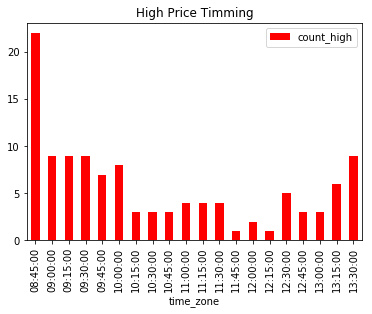

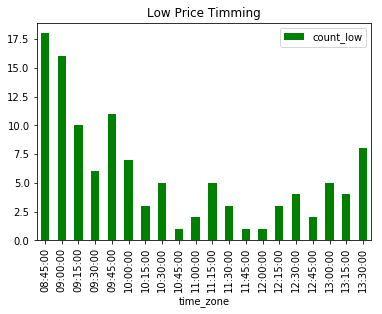

In [15]:
finish_df.plot(kind='bar',x='time_zone', y='count_high', color= 'red', title='High Price Timming')

finish_df.plot(kind='bar',x='time_zone', y='count_low', color= 'green', title='Low Price Timming')
plt.show()